# Assignment 2
## Graphs and Networks
### Gerardo Durán Martín | MTH750P

In [11]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from numpy.random import seed

In [12]:
%config InlineBackend.figure_format = "retina"

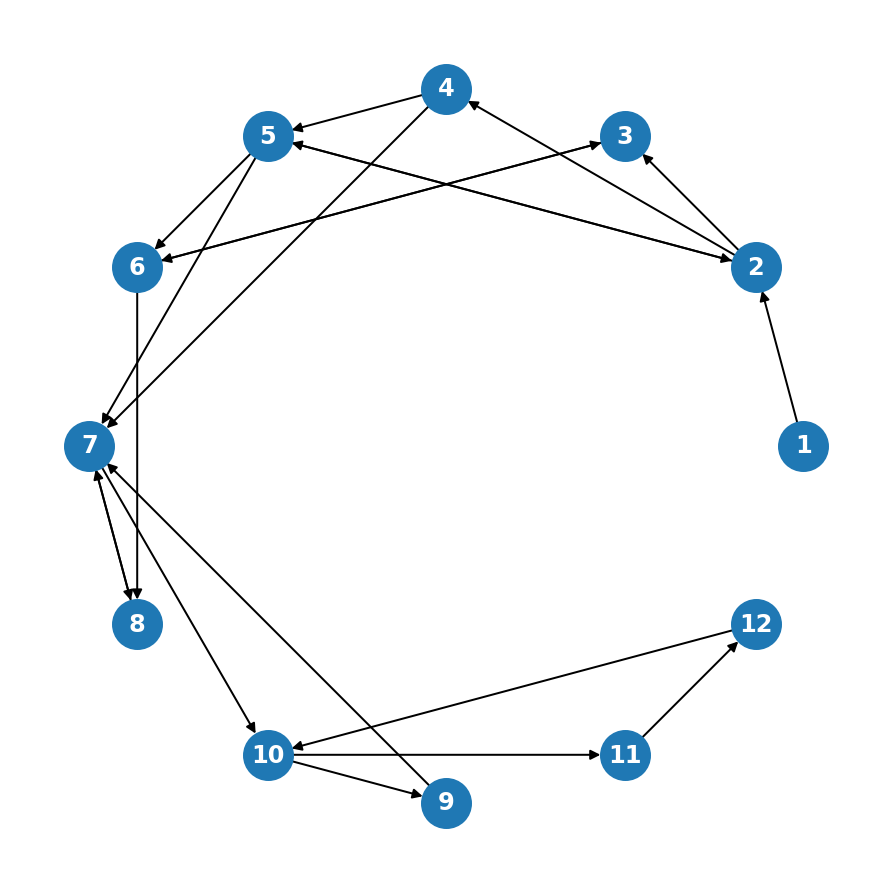

In [13]:
edges = [(1,2), (2,3), (2,4), (2,5), (3,6), (4,5), (4,7), (5,2), (5,6), (5,7), (6,3),
         (6,8), (7,8), (7,10), (8,7), (9,7), (10,9), (10,11), (11,12), (12,10)]


G = nx.DiGraph()
G.add_edges_from(edges)

plt.figure(figsize=(6,6))
nx.draw(G, with_labels=True, font_color="white",
        font_weight="bold", pos=nx.circular_layout(G), node_size=600)

In [14]:
nx.is_strongly_connected(G)

False

In [15]:
nx.is_weakly_connected(G)

True

## 3) Bipartite Graph

In [16]:
A = np.array([
    [1, 0, 1, 0, 0, 1],
    [1, 1, 1, 1, 0, 0],
    [0, 1, 1, 0, 1, 1],
    [0, 0, 1, 1, 1, 0]
])

In [17]:
# Projection on the first set of nodes
B = A @ A.T
B

array([[3, 2, 2, 1],
       [2, 4, 2, 2],
       [2, 2, 4, 2],
       [1, 2, 2, 3]])

In [18]:
# Projection on the second set of nodes
C = A.T @ A
C

array([[2, 1, 2, 1, 0, 1],
       [1, 2, 2, 1, 1, 1],
       [2, 2, 4, 2, 2, 2],
       [1, 1, 2, 2, 1, 0],
       [0, 1, 2, 1, 2, 1],
       [1, 1, 2, 0, 1, 2]])

## 4) Four color theorem

Given the `Europe.csv` file with the list of all European country pairs that share a border, prove that all countries  be coloured in 4 colours in such a way that countries of the same colour don’t share a border.

In [69]:
europe = pd.read_csv("../data/europe/Europe.csv")
europe

,country_code,country_name,country_border_code,country_border_name
0,AD,Andorra,FR,France
1,AD,Andorra,ES,Spain
2,AL,Albania,GR,Greece
3,AL,Albania,ME,Montenegro
4,AL,Albania,MK,North Macedonia
...,...,...,...,...
170,UA,Ukraine,PL,Poland
171,UA,Ukraine,RO,Romania
172,UA,Ukraine,RU,Russian Federation
173,UA,Ukraine,SK,Slovakia


In [70]:
countries = europe["country_name"].unique()
n_countries = len(countries)
print(f"There are {n_countries} countries")
countries

There are 45 countries


array(['Andorra', 'Albania', 'Armenia', 'Austria', 'Azerbaijan',
       'Bosnia and Herzegovina', 'Belgium', 'Bulgaria', 'Belarus',
       'Switzerland', 'Czechia', 'Germany', 'Denmark', 'Estonia', 'Spain',
       'Finland', 'France',
       'United Kingdom of Great Britain and Northern Ireland', 'Georgia',
       'Gibraltar', 'Greece', 'Croatia', 'Hungary', 'Ireland', 'Italy',
       'Kazakhstan', 'Liechtenstein', 'Lithuania', 'Luxembourg', 'Latvia',
       'Monaco', 'Montenegro', 'Netherlands', 'Norway', 'Poland',
       'Portugal', 'Romania', 'Serbia', 'Russian Federation', 'Sweden',
       'Slovenia', 'Slovakia', 'San Marino', 'Ukraine', 'Holy See'],
      dtype=object)

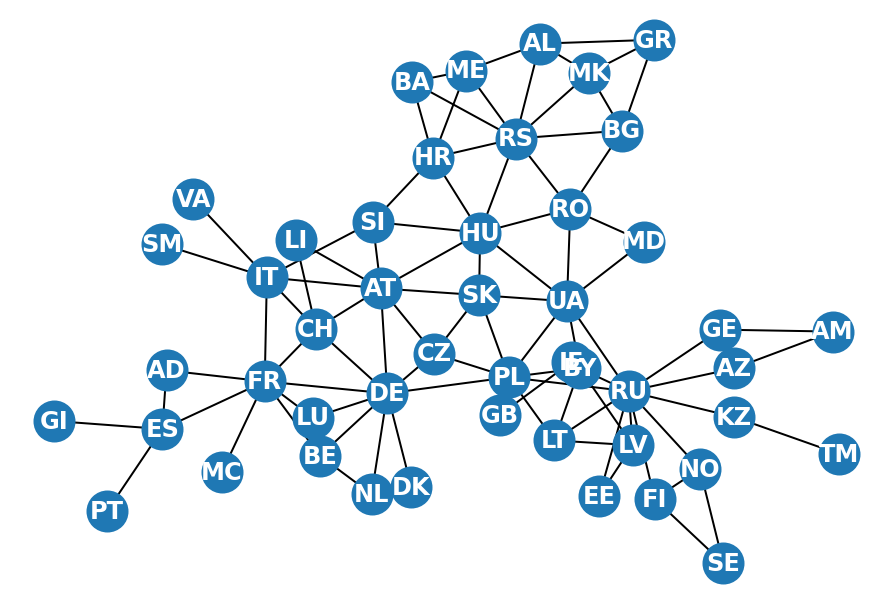

In [71]:
border_nodes = europe[["country_code", "country_border_code"]].values

G = nx.Graph()
G.add_edges_from(border_nodes)

pos = nx.kamada_kawai_layout(G)
nx.draw(G, with_labels=True, font_color="white", font_weight="bold", node_size=400, pos=pos)

<AxesSubplot:xlabel='country_border_code', ylabel='country_code'>

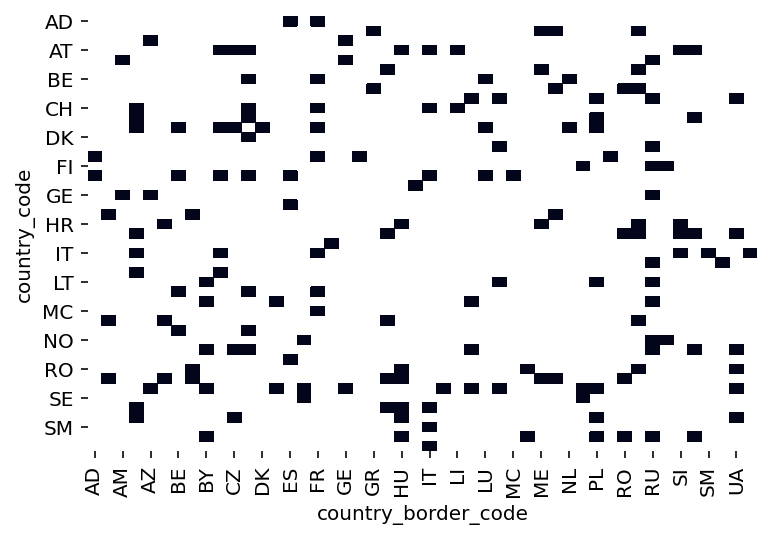

In [93]:
country_matrix = (europe[["country_code", "country_border_code"]]
                  .assign(id=1)
                  .pivot_table(index="country_code",
                               columns="country_border_code",
                               values="id",
                               aggfunc="sum"))

sns.heatmap(country_matrix, cbar=False)

To prove the following 4-colour theorem for the europe map, we initialize all nodes with randomly-selected colours. Then, we start start at a randomly-selected node. 

```
1. If the node has a shared 
```

In [95]:
from numpy.random import choice

In [587]:
seed(314)
colors = ["#4E79A7", "#E15795", "#59A14F", "#B07AA1"]
# initial colors
node_colors_map = {node: choice(colors) for node in G}
node_colors = list(node_colors_map.values())

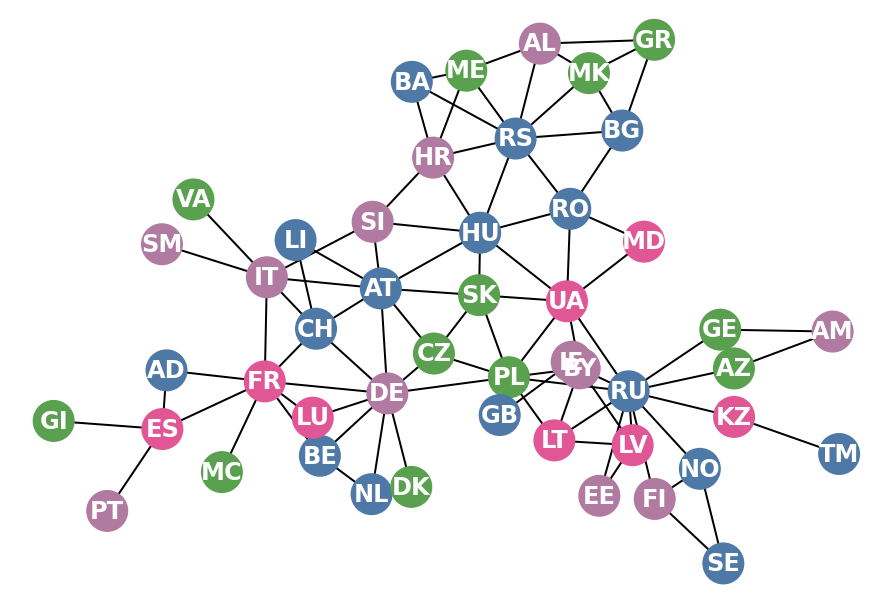

In [588]:
border_nodes = europe[["country_code", "country_border_code"]].values

G = nx.Graph()
G.add_edges_from(border_nodes)

pos = nx.kamada_kawai_layout(G)
nx.draw(G, with_labels=True, font_color="white", font_weight="bold",
        node_size=400, pos=pos, node_color=node_colors)

In [594]:
def recolor_node(node, G, map_colors, list_colors):
    fail = False
    node_color = map_colors[node]
    neighbors = G[node]
    neigh_colors = [map_colors[neigh] for neigh in neighbors]
    possible_colors = list(set(list_colors) - set(neigh_colors))
    
    if len(possible_colors) == 0:
        fail = True
        possible_colors = list(set(list_colors) - set(node_color))
        new_color = choice(possible_colors)
        new_map = {nnode: new_color for nnode in G if nnode != node}
        print(new_color, node_color)
        
    elif node_color in neigh_colors:
        fail = False
        new_color = choice(possible_colors)
        new_map = {node: new_color}
    else:
        new_color = node_color
        new_map = {}
    
    return new_map, fail

def recolor_nodes(G, map_colors, list_colors):
    new_map_colors = node_colors_map.copy()
    
    total_fails = 0
    for node in G:
        new_map, fail = recolor_node(node, G, new_map_colors, list_colors)
        new_map_colors = {**new_map_colors, **new_map}
        total_fails += fail
    
    return new_map_colors, total_fails

In [595]:
seed(31415)
colors = ["#4E79A7", "#E15795", "#59A14F", "#B07AA1"]
# initial colors
init_colors_map = {node: choice(colors) for node in G}
node_colors = list(init_colors_map.values())

colors_map = init_colors_map.copy()

In [597]:
colors_map, fails = recolor_nodes(G, colors_map, colors)
fails

#E15795 #E15795
#59A14F #E15795
#E15795 #59A14F


3

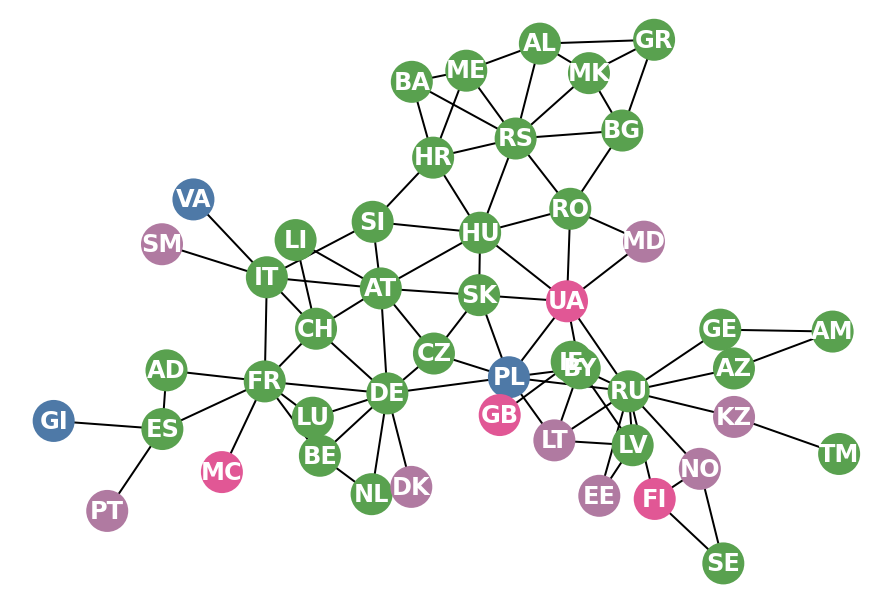

In [593]:
node_colors = list(colors_map.values())
nx.draw(G, with_labels=True, font_color="white", font_weight="bold",
        node_size=400, pos=pos, node_color=node_colors)

In [582]:
list(G["FR"])

['AD', 'BE', 'CH', 'DE', 'ES', 'IT', 'LU', 'MC']